<a href="https://colab.research.google.com/github/PrithaSarkar/Dissertation/blob/main/Pull_request_Analysis_%26_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GPU Availability**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


Installing/upgrading and importing the necessary packages for experiment.


In [2]:
!pip install --upgrade missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 51 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [4]:
!pip install --upgrade hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.9 MB/s 
     |████████████████████████████████| 200 kB 74.9 MB/s 
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.2


In [5]:
!pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 16.0 MB/s 


In [6]:
!pip install --upgrade mxnet gluonnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 81.6 MB/s 
     |████████████████████████████████| 344 kB 78.4 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595744 sha256=b9bd2f36d11f17352d4553134f1953994d0a369befdc51b8ceef637d8b1cce0f
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import sklearn

Mounting drive and loading the datafile. Change the location as applicable.

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Dissertation UofG 2022/new_pullreq.csv")
df

,id,project_id,github_id,pull_request_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,1895,16946031,stylelint,stylelint,1,237,237.0,1,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,353,51228565,Joaogarciadelima,checklistos,0,1410,NaN,1,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,404,42975776,binary-com,SmartCharts,1,4,4.0,1,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,3434,34700062,letsencrypt,boulder,1,52,52.0,1,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,486,34175163,PyCQA,astroid,1,2414,2414.0,1,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,3347933,30544060,258,25263316,Kronos-Integration,kronos-service-consul,1,9,9.0,1,...,0,0,0,0,2537.0,0,0.696970,0,9,0
3347933,3347934,1142,27876,9812944,saltstack,salt,0,1165,NaN,1,...,0,1,0,0,42.0,0,0.056849,0,1165,0
3347934,3347935,31499094,444,19063491,mjmlio,mjml,1,8834,8834.0,2,...,0,8,0,0,597.0,0,0.002041,0,8834,0
3347935,3347936,55317,651,2087506,zotonic,zotonic,0,703,NaN,7,...,0,0,0,0,10.0,0,0.000732,0,703,0


In [9]:
columns = df.columns.to_list()
print(len(columns))
print(columns)

120
['id', 'project_id', 'github_id', 'pull_request_id', 'ownername', 'reponame', 'merged_or_not', 'lifetime_minutes', 'mergetime_minutes', 'num_commits', 'src_churn', 'test_churn', 'files_added', 'files_deleted', 'files_modified', 'files_changed', 'src_files', 'doc_files', 'other_files', 'num_commit_comments', 'num_issue_comments', 'num_comments', 'num_participants', 'sloc', 'team_size', 'perc_external_contribs', 'commits_on_files_touched', 'test_lines_per_kloc', 'test_cases_per_kloc', 'asserts_per_kloc', 'watchers', 'prev_pullreqs', 'requester_succ_rate', 'followers', 'churn_addition', 'churn_deletion', 'pr_comment_num', 'comment_num', 'perc_neg_emotion', 'perc_pos_emotion', 'perc_neu_emotion', 'part_num_issue', 'part_num_commit', 'part_num_pr', 'part_num_code', 'comment_conflict', 'hash_tag', 'at_tag', 'test_inclusion', 'description_length', 'bug_fix', 'ci_exists', 'ci_latency', 'ci_build_num', 'ci_test_passed', 'ci_failed_perc', 'ci_first_build_status', 'ci_last_build_status', 'lan

The "merged_or_not" metric states whether a pull-request was accepted or not. Let us check, how many of the 3 million pull-request was accepted and how many were rejected.

In [10]:
def class_balance(dataframe):
  accepted = 0
  rejected = 0
  for ind in dataframe.index:
    if dataframe["merged_or_not"][ind]==1:
      accepted = accepted+1
    else:
      rejected = rejected+1
  print("Accepted:", accepted)
  print("Percentage:", (accepted/len(dataframe))*100)
  print("Rejected:", rejected)
  print("Percentage:", (rejected/len(dataframe))*100)

In [11]:
class_balance(df)

Accepted: 2710096
Percentage: 80.94823767591804
Rejected: 637841
Percentage: 19.051762324081963


There is a huge imbalance in the two classes. This needs to be kept in mind from this point onwards.

The original dataset has 120 columns/metrics related to each pull-request. However, we will only focus on the metrics present in Table 1 of [this paper](https://dl.acm.org/doi/10.1145/3379597.3387489).

Code in the next 2 cells were taken from [this](https://stackoverflow.com/a/57198258) blog.

In [12]:
def flow_from_df(dataframe: pd.DataFrame, chunk_size: int):
  for start_row in range(0, dataframe.shape[0], chunk_size):
    end_row  = min(start_row + chunk_size, dataframe.shape[0])
    yield dataframe.iloc[start_row:end_row, :]

In [13]:
chunk_size = len(df)/2
get_chunk = flow_from_df(df, int(chunk_size))
train_test = next(get_chunk)
train_test

,id,project_id,github_id,pull_request_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,1895,16946031,stylelint,stylelint,1,237,237.0,1,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,353,51228565,Joaogarciadelima,checklistos,0,1410,NaN,1,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,404,42975776,binary-com,SmartCharts,1,4,4.0,1,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,3434,34700062,letsencrypt,boulder,1,52,52.0,1,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,486,34175163,PyCQA,astroid,1,2414,2414.0,1,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673963,1673964,8504763,1205,20816393,os-autoinst,openQA,1,77,77.0,1,...,1,2,0,0,6.0,1,0.119597,0,77,0
1673964,1673965,10789805,141,4184228,geopandas,geopandas,1,418,418.0,4,...,1,2,0,0,48.0,0,0.037736,0,418,0
1673965,1673966,26051663,5794,45711167,JMRI,JMRI,1,151,151.0,1,...,0,0,0,0,51.0,0,0.094772,0,151,0
1673966,1673967,4952323,91,2361445,spring-projects,spring-data-mongodb,0,122689,NaN,3,...,0,0,0,0,149.0,0,0.478788,0,122689,0


In [14]:
list_of_metrics = ['id','acc_commit_num', 'first_pr', 'core_member',
                  'contrib_gender', 'same_country', 'same_affiliation',
                  'social_strength', 'account_creation_days',
                  'first_response_time', 'contrib_country',
                  'prior_interaction', 'contrib_affiliation', 'perc_external_contribs',
                  'contrib_first_emo', 'contrib_follow_integrator',
                  'language', 'project_age', 'pushed_delta',
                  'pr_succ_rate', 'open_issue_num', 'open_pr_num', 'fork_num',
                  'churn_addition', 'bug_fix', 'test_inclusion',
                  'hash_tag', 'at_tag', 'part_num_issue', 'part_num_commit',
                  'part_num_pr', 'part_num_code','ci_exists', 'ci_latency',
                  'ci_test_passed', 'ci_failed_perc', 'churn_deletion',
                  'description_length', 'comment_conflict', 'pr_comment_num',
                  'part_num_code', 'ci_build_num', 'perc_inte_neg_emo', 'perc_inte_pos_emo',
                  'perc_inte_neu_emo','ci_first_build_status', 'ci_last_build_status',
                   'merged_or_not']

In [15]:
for metric in columns:
  if metric not in list_of_metrics:
    train_test.drop(metric, axis=1, inplace=True)

train_test

,id,merged_or_not,perc_external_contribs,churn_addition,churn_deletion,pr_comment_num,part_num_issue,part_num_commit,part_num_pr,part_num_code,...,contrib_affiliation,contrib_first_emo,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation
0,1,1,0.089869,0,0,0,1,0,0,0,...,NaN,NaN,0.000000,0.0,1.000000,0,28,0.000000,NaN,NaN
1,2,0,0.014019,0,0,0,1,0,0,0,...,NaN,NaN,0.000000,0.0,0.000000,0,300,0.250000,NaN,NaN
2,3,1,0.256849,0,0,0,0,0,0,0,...,NaN,NaN,0.000000,0.0,0.000000,0,505,0.428571,1.0,NaN
3,4,1,0.014706,110,3,0,0,0,0,0,...,NaN,NaN,0.000000,0.0,0.000000,1,460,0.138889,NaN,NaN
4,5,1,0.173077,60,0,0,1,0,0,0,...,NaN,NaN,0.000000,1.0,0.000000,1,6,0.125000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673963,1673964,1,0.011392,4,0,0,3,0,0,0,...,suse,neutral,0.000000,1.0,0.000000,0,132,0.384615,NaN,1.0
1673964,1673965,1,0.018182,173,2,0,4,0,0,0,...,mapbox,neutral,0.333333,0.0,0.666667,0,36,0.400000,1.0,0.0
1673965,1673966,1,0.254067,1,0,0,0,0,0,0,...,acm,NaN,0.000000,0.0,0.000000,0,204,0.215686,1.0,1.0
1673966,1673967,0,0.150327,15,14,0,0,0,0,0,...,NaN,NaN,0.000000,0.0,0.000000,1,88,0.285714,NaN,NaN


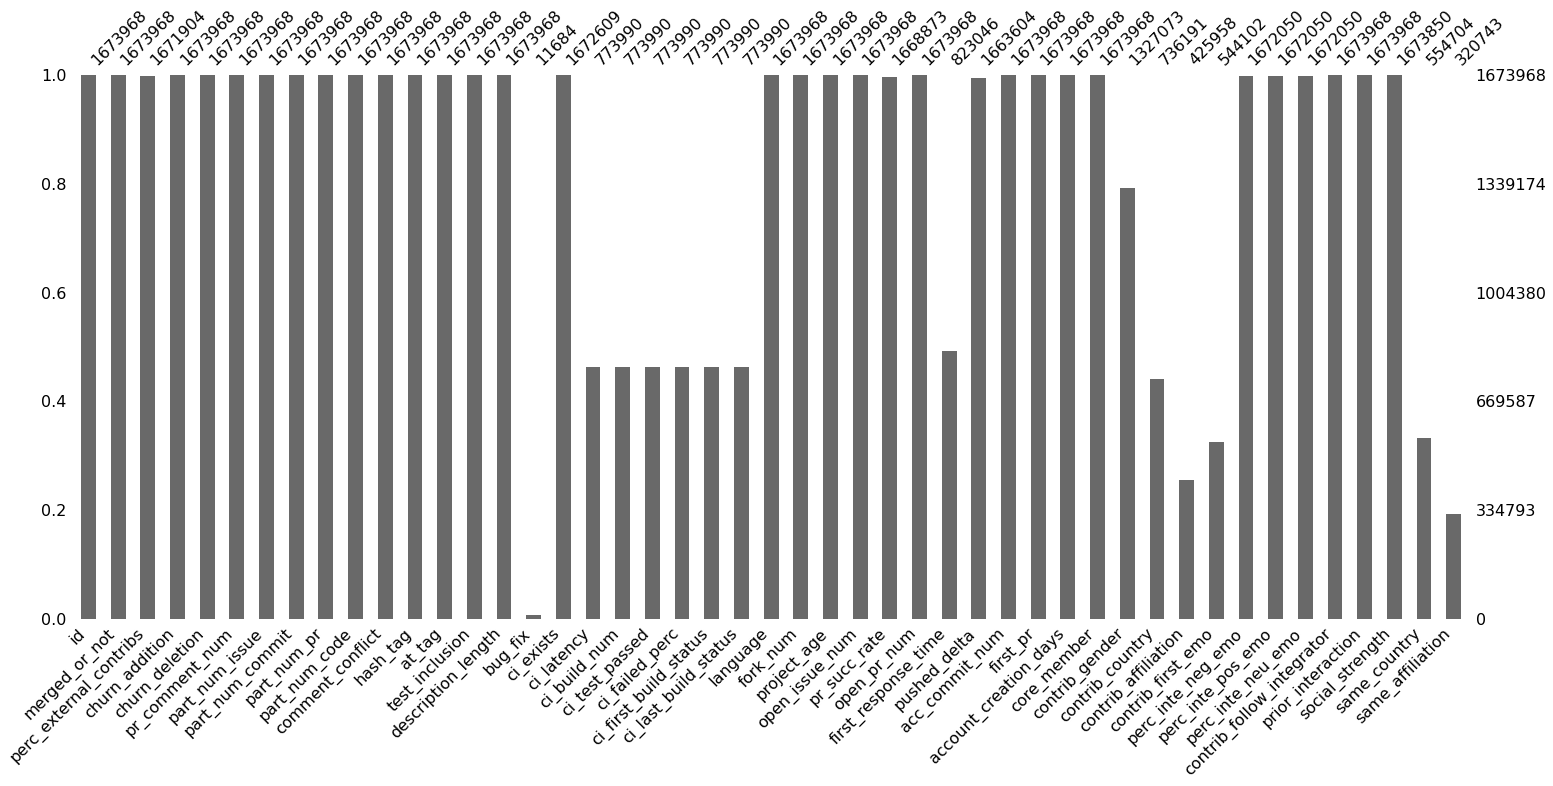

In [16]:
msno.bar(train_test)

A huge amount of data is missing. Preprocessing is a must at this stage. Although a couple of way of preprocessing data exists, the decision to exchange the NaN values with a the most commonly occuring one for individual column has been adapted.

In [17]:
train_test = train_test.fillna(train_test.mode().iloc[0])

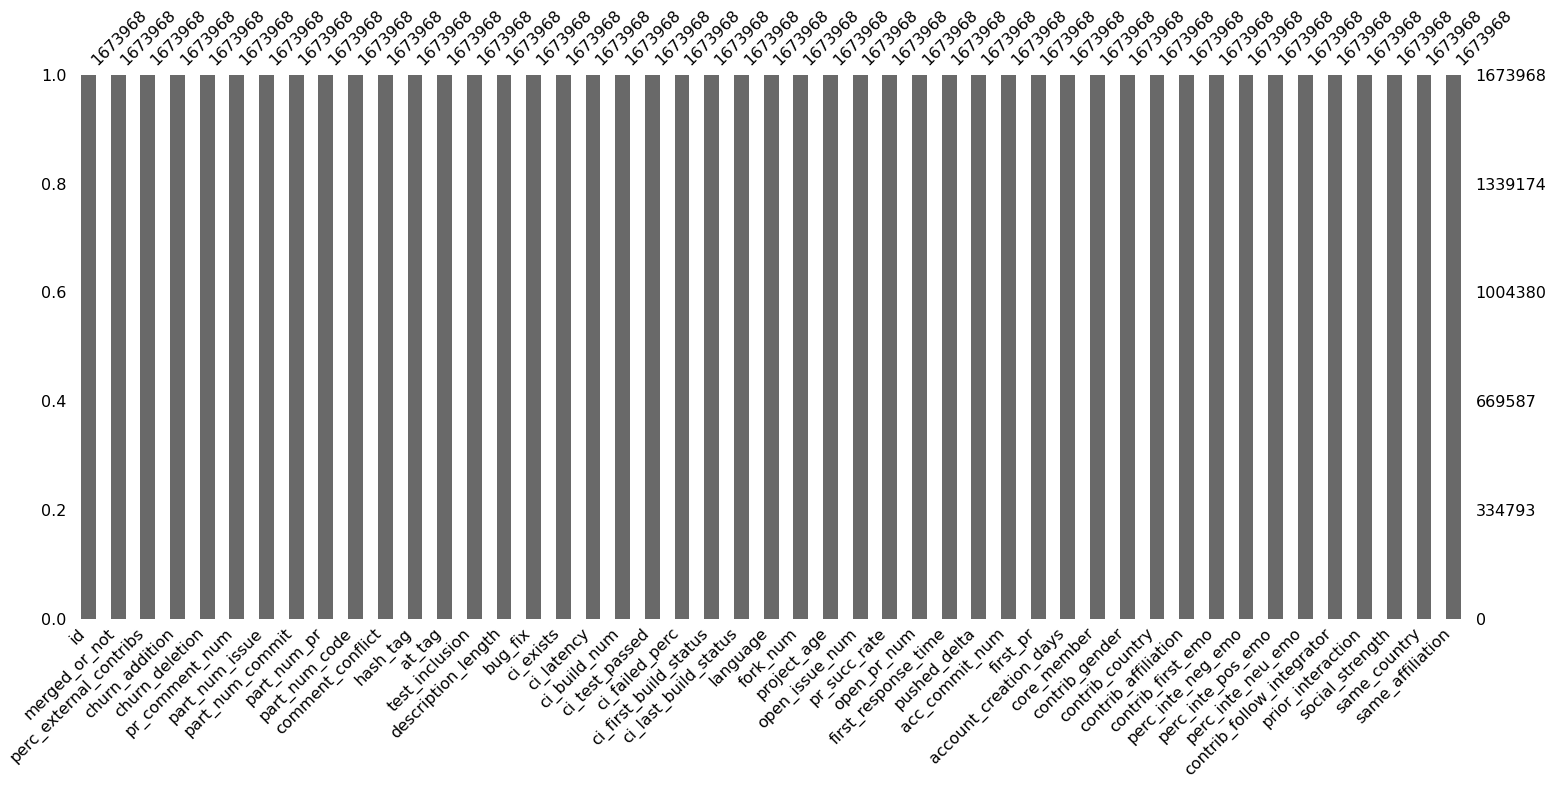

In [18]:
msno.bar(train_test)

Let us now see the percentage of accepted and rejected pull-request in this data chunk and see if the class imbalance remains the same or has worsened.

In [19]:
class_balance(train_test)

Accepted: 1355422
Percentage: 80.97060397809277
Rejected: 318546
Percentage: 19.029396021907232


An important step before that would be to check the data types of every column since classification models would expect int, bool or float daat types. However, the dataset is diverse and annotation is required.

In [20]:
print(train_test.dtypes)

id                             int64
merged_or_not                  int64
perc_external_contribs       float64
churn_addition                 int64
churn_deletion                 int64
pr_comment_num                 int64
part_num_issue                 int64
part_num_commit                int64
part_num_pr                    int64
part_num_code                  int64
comment_conflict               int64
hash_tag                       int64
at_tag                         int64
test_inclusion                 int64
description_length             int64
bug_fix                      float64
ci_exists                    float64
ci_latency                   float64
ci_build_num                 float64
ci_test_passed               float64
ci_failed_perc               float64
ci_first_build_status         object
ci_last_build_status          object
language                      object
fork_num                       int64
project_age                    int64
open_issue_num                 int64
p

Metrics "ci_first_build_status", "ci_last_build_status", "language", "contrib_gender", contrib_country", "contrib_affiliation", "contrib_first_emo" have data type of object. This would cause trouble when deploying XGBoost. Annotation is needed in this case; manual or otherwise. Let's check the unique values present in each of these metrics.

In [21]:
object_metrics = ['ci_first_build_status', 'ci_last_build_status', 'language', 
                  'contrib_gender', 'contrib_country', 'contrib_affiliation', 'contrib_first_emo']

for metric in object_metrics:
    globals()['unique_%s' % metric] = train_test[metric].unique()
    print(metric,':', len(train_test[metric].unique()))

ci_first_build_status : 2
ci_last_build_status : 2
language : 6
contrib_gender : 2
contrib_country : 175
contrib_affiliation : 1202
contrib_first_emo : 3


Annotation has been done manually after creation of dictionaries. This was done to harvest the values and their corresponding labels for future purposes. Another thing to note is that the labels start from '1' as opposed to '0' like in LabelEncoder. This decision was taken due to problem encountered in the later half of the experiment. More explanation regarding this will be available later on during the recommendation process.

In [22]:
for metric in object_metrics:
    if metric == 'ci_first_build_status':
        dict_ci_first_build_status = {}
        value = 1
        for key in unique_ci_first_build_status:
            dict_ci_first_build_status[key] = value
            value += 1 
    if metric == 'ci_last_build_status':
        dict_ci_last_build_status = {}
        value = 1
        for key in unique_ci_last_build_status:
            dict_ci_last_build_status[key] = value
            value += 1 
    if metric == 'language':
        dict_language = {}
        value = 1
        for key in unique_language:
            dict_language[key] = value
            value += 1
    if metric == 'contrib_gender':
        dict_contrib_gender = {}
        value = 1
        for key in unique_contrib_gender:
            dict_contrib_gender[key] = value
            value += 1 
    if metric == 'contrib_country':
        dict_contrib_country = {}
        value = 1
        for key in unique_contrib_country:
            dict_contrib_country[key] = value
            value += 1 
    if metric == 'contrib_affiliation':
        dict_contrib_affiliation = {}
        value = 1
        for key in unique_contrib_affiliation:
            dict_contrib_affiliation[key] = value
            value += 1 
    if metric == 'contrib_first_emo':
        dict_contrib_first_emo = {}
        value = 1
        for key in unique_contrib_first_emo:
            dict_contrib_first_emo[key] = value
            value += 1

In [23]:
for metric in object_metrics:
    if metric == 'ci_first_build_status':
        for key in dict_ci_first_build_status:
            train_test[metric].replace(key, dict_ci_first_build_status[key], inplace = True)
    if metric == 'ci_last_build_status':
        for key in dict_ci_last_build_status:
            train_test[metric].replace(key, dict_ci_last_build_status[key], inplace = True)
    if metric == 'language':
        for key in dict_language:
            train_test[metric].replace(key, dict_language[key], inplace = True)
    if metric == 'contrib_gender':
        for key in dict_contrib_gender:
            train_test[metric].replace(key, dict_contrib_gender[key], inplace = True)
    if metric == 'contrib_country':
        for key in dict_contrib_country:
            train_test[metric].replace(key, dict_contrib_country[key], inplace = True)
    if metric == 'contrib_affiliation':
        for key in dict_contrib_affiliation:
            train_test[metric].replace(key, dict_contrib_affiliation[key], inplace = True)
    if metric == 'contrib_first_emo':
        for key in dict_contrib_first_emo:
            train_test[metric].replace(key, dict_contrib_first_emo[key], inplace = True)

In [24]:
train_test.language

0          1
1          2
2          1
3          3
4          2
          ..
1673963    1
1673964    2
1673965    5
1673966    5
1673967    1
Name: language, Length: 1673968, dtype: int64

The train_test dataframe is divided into two. One will be used to train the model while the other will be used for testing. The training sample will contain 60% of the rows present in the original train_test dataframe while the testing sample will contain the remaining 40%.

In [25]:
chunk_size = int(len(train_test)*0.6)
get_chunk = flow_from_df(train_test, chunk_size)
train = next(get_chunk)

In [26]:
test = train_test.iloc[(train.index[-1]+1):train_test.index[-1], :]

In [27]:
len(train), len(test)

(1004380, 669587)

In [28]:
train.head(1)

,id,merged_or_not,perc_external_contribs,churn_addition,churn_deletion,pr_comment_num,part_num_issue,part_num_commit,part_num_pr,part_num_code,...,contrib_affiliation,contrib_first_emo,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation
0,1,1,0.089869,0,0,0,1,0,0,0,...,1,1,0.0,0.0,1.0,0,28,0.0,1.0,1.0


In [29]:
test.head(1)

,id,merged_or_not,perc_external_contribs,churn_addition,churn_deletion,pr_comment_num,part_num_issue,part_num_commit,part_num_pr,part_num_code,...,contrib_affiliation,contrib_first_emo,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation
1004380,1004381,1,0.0,0,0,0,4,0,0,0,...,94,1,0.0,0.0,0.0,0,523,0.714286,1.0,1.0


# ***XGBoost***

In [30]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

Hyperparameter Tuning of XGBoost.

The next 3 cells contain code from the Kaggle notebook "[A Guide on XGBoost hyperparameters tuning](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook)"



In [31]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0}

def objective(space):
    clf=xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(train.iloc[:, 2:], train["merged_or_not"]), (test.iloc[:, 2:], test["merged_or_not"])]
    
    clf.fit(train.iloc[:, 2:], train["merged_or_not"],
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(test.iloc[:, 2:])
    accuracy = accuracy_score(test["merged_or_not"], pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [32]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.8327655704187805
SCORE:
0.8318500807213999
SCORE:
0.8315364545607964
SCORE:
0.8325773947224184
SCORE:
0.8262570808573045
SCORE:
0.8313273704537274
SCORE:
0.8273547724194168
SCORE:
0.8319262470746893
SCORE:
0.8317993031525402
SCORE:
0.8321846152927103
SCORE:
0.8305851218736325
SCORE:
0.8327118059341057
SCORE:
0.8323832451944259
SCORE:
0.8322368863194776
SCORE:
0.8271307537332714
SCORE:
0.8321786414610798
SCORE:
0.8325490190221734
SCORE:
0.8322503274406462
SCORE:
0.8317216433413432
SCORE:
0.8322174713666782
SCORE:
0.8331553629326734
SCORE:
0.8331359479798741
SCORE:
0.8331986732119948
SCORE:
0.8324444769686389
SCORE:
0.833173284427565
SCORE:
0.8324788265005145
SCORE:
0.8332210750806094
SCORE:
0.8330657554582153
SCORE:
0.8324579180898076
SCORE:
0.8321801349189873
SCORE:
0.8325923293014948
SCORE:
0.8328596582669616
SCORE:
0.8325564863117115
SCORE:
0.8260435163765126
SCORE:
0.8331389348956895
SCORE:
0.83275959658715
SCORE:
0.8312586713899762
SCORE:
0.8315454153082422
SCORE:
0.831848

In [33]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.601114543197138, 'gamma': 1.23569164933463, 'max_depth': 12.0, 'min_child_weight': 2.0, 'reg_alpha': 40.0, 'reg_lambda': 0.3383439139121867}


In [34]:
X = train.iloc[:, 2:]
y = train["merged_or_not"]

In [35]:
model = xgb.XGBClassifier(max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                          reg_alpha = int(best_hyperparams['reg_alpha']), min_child_weight=int(best_hyperparams['min_child_weight']),
                          colsample_bytree=int(best_hyperparams['colsample_bytree']))

First trail with fit and predict.

In [36]:
#Fitting the model
start=datetime.now()

model.fit(X,y)

print("Computation Time")
print(datetime.now()-start)

#Prediction
y_pred = model.predict(test.iloc[:, 2:])
print("Prediction")
print(y_pred)

Computation Time
0:00:21.883454
Prediction
[1 1 1 ... 1 1 1]


In [37]:
results = (test['merged_or_not'] == y_pred)
accuracy = results.sum() / results.size
print(accuracy)

0.8277326172700485


The "evaluation_summary" function is copied from [this](https://colab.research.google.com/drive/1W3WdSNqdnuuu8GLGr28TSEbpC46LW7f2) notebook.

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, true_labels, predictions, target_classes):
  print("Evaluation for: " + description)
  target_names = target_classes
  report = classification_report(true_labels, predictions,  digits=3, zero_division=0, target_names=target_names)
  cm = confusion_matrix(true_labels, predictions)
  plt.figure(figsize=(5,5))
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax)
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title("Confusion Matrix")
  ax.xaxis.set_ticklabels(target_names) 
  ax.yaxis.set_ticklabels(target_names)
  return report

Evaluation for: Baseline Model
              precision    recall  f1-score   support

    Rejected      0.695     0.163     0.264    126934
    Accepted      0.834     0.983     0.902    542653

    accuracy                          0.828    669587
   macro avg      0.764     0.573     0.583    669587
weighted avg      0.808     0.828     0.781    669587



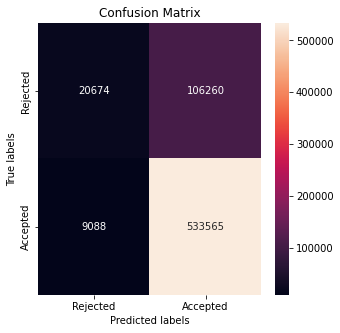

In [39]:
target_classes = ['Rejected', 'Accepted']
print(evaluation_summary("Baseline Model", test["merged_or_not"], y_pred , target_classes))

ROC-AUC curve code taken from [here](https://www.kaggle.com/code/beletecheneke/xgboost-with-roc-curve-notebook-auprc-93) 

In [40]:
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
def roc_auc_curve(test_results, y_pred):
  fpr, tpr, _ = roc_curve(test_results.values, y_pred)
  roc_auc = auc(fpr, tpr)
  #xgb.plot_importance(gbm)
  #plt.show()
  plt.figure(figsize=(5,5))
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([-0.02, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc="lower right")
  plt.show()

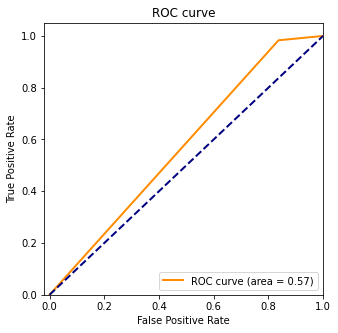

In [41]:
roc_auc_curve(test["merged_or_not"], y_pred)

### **Feature Selection with XGBoost**

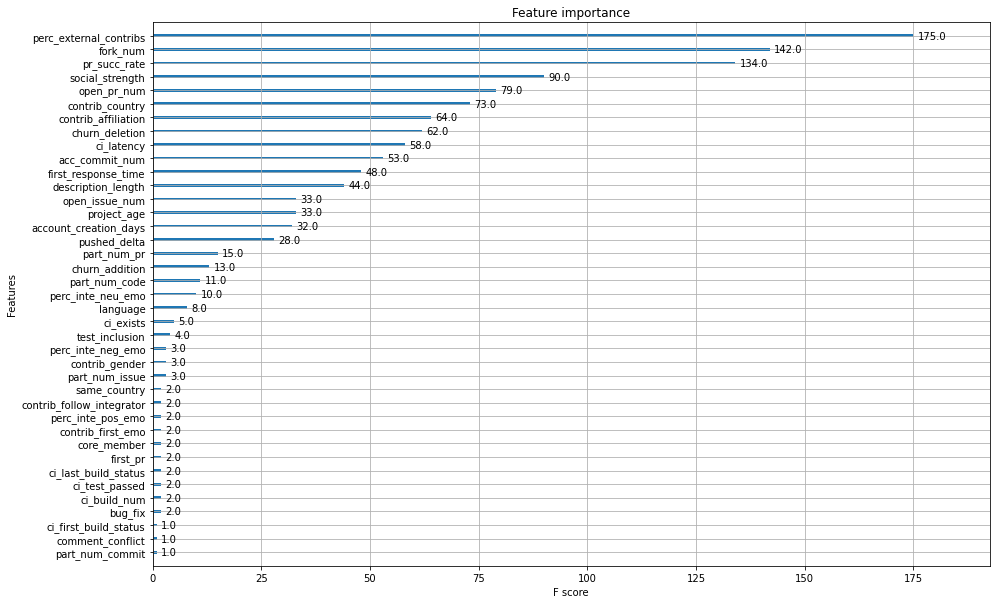

In [42]:
plt.rcParams["figure.figsize"] = (15, 10)
plot_importance(model)
plt.show()

We can see that some features work very poorly and contribute very little to the model. Attempt now should be made to identify the most important features without damaging the model score.

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [44]:
sorted_idx = np.argsort(model.feature_importances_)[::-1]

for index in sorted_idx:
  print([X.columns[index], model.feature_importances_[index]])

['ci_last_build_status', 0.24167833]
['core_member', 0.23765129]
['part_num_issue', 0.16189131]
['ci_build_num', 0.054558802]
['ci_first_build_status', 0.041673012]
['first_pr', 0.041293345]
['ci_exists', 0.02635729]
['part_num_commit', 0.025682155]
['perc_inte_pos_emo', 0.021371162]
['contrib_follow_integrator', 0.021180367]
['acc_commit_num', 0.019347258]
['contrib_first_emo', 0.014700067]
['same_country', 0.0125083355]
['language', 0.010392028]
['ci_test_passed', 0.009497247]
['open_pr_num', 0.0071660695]
['description_length', 0.0070639974]
['open_issue_num', 0.0063185664]
['account_creation_days', 0.0049437135]
['pr_succ_rate', 0.0038450176]
['first_response_time', 0.0037446804]
['fork_num', 0.002792273]
['ci_latency', 0.0027003235]
['contrib_gender', 0.0025613788]
['contrib_affiliation', 0.00216667]
['comment_conflict', 0.0020959827]
['project_age', 0.0018670487]
['perc_inte_neu_emo', 0.0018514622]
['part_num_pr', 0.0016569793]
['pushed_delta', 0.0016308214]
['churn_deletion', 0.

**Strategy 1:** Using the mean of the feature importance scores, i.e., gain, to determine the best performing features.

In [45]:
sum = 0.0
for value in model.feature_importances_:
  sum = sum+value

threshold_1 = sum/len(model.feature_importances_)
print(threshold_1)

0.022222223415479272


In [46]:
imp_features_1 = []
for index in sorted_idx:
  if model.feature_importances_[index]>=threshold_1:
    imp_features_1.append(X.columns[index])

print(imp_features_1)
print(len(imp_features_1))

['ci_last_build_status', 'core_member', 'part_num_issue', 'ci_build_num', 'ci_first_build_status', 'first_pr', 'ci_exists', 'part_num_commit']
8


In [47]:
model_new = xgb.XGBClassifier(max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                          reg_alpha = int(best_hyperparams['reg_alpha']), min_child_weight=int(best_hyperparams['min_child_weight']),
                          colsample_bytree=int(best_hyperparams['colsample_bytree']))

In [48]:
X_new_1 = pd.DataFrame(columns = imp_features_1)
for feature in imp_features_1:
  X_new_1[feature] = train[feature]

start=datetime.now()

model_new.fit(X_new_1, y)

print("Computation Time")
print(datetime.now()-start)

test_new_1 = pd.DataFrame(columns = imp_features_1)
for feature in imp_features_1:
  test_new_1[feature] = test[feature]

y_pred_new_1 = model_new.predict(test_new_1)

Computation Time
0:00:06.256320


In [49]:
results_new_1 = (test["merged_or_not"] == y_pred_new_1)
accuracy_new_1 = results_new_1.sum() / results_new_1.size
print(accuracy_new_1)

0.8135731428477554


Evaluation for: Performance of new model with fewer features
              precision    recall  f1-score   support

    Rejected      0.582     0.059     0.107    126934
    Accepted      0.818     0.990     0.896    542653

    accuracy                          0.814    669587
   macro avg      0.700     0.525     0.502    669587
weighted avg      0.773     0.814     0.746    669587



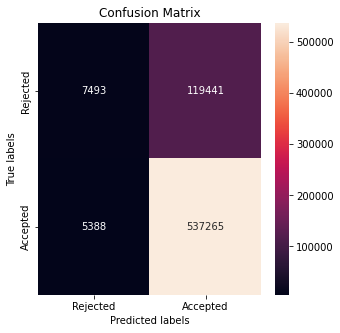

In [50]:
print(evaluation_summary("Performance of new model with fewer features", test["merged_or_not"], y_pred_new_1 , target_classes))

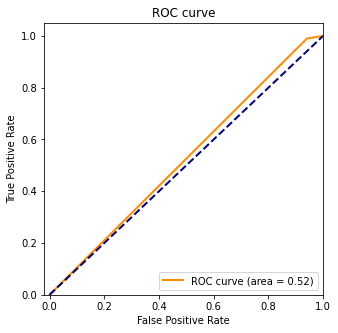

In [51]:
roc_auc_curve(test["merged_or_not"], y_pred_new_1)

**Strategy 2:** Standard Deviation for determining threshold.

In [52]:
threshold_2 = np.std(model.feature_importances_)
print(threshold_2)

0.053487666


In [53]:
imp_features_2 = []
for index in sorted_idx:
  if model.feature_importances_[index]>=threshold_2:
    feature_to_consider_1 = X.columns[index]
    imp_features_2.append(feature_to_consider_1)

print(imp_features_2)
print(len(imp_features_2))

['ci_last_build_status', 'core_member', 'part_num_issue', 'ci_build_num']
4


In [54]:
X_new_2 = pd.DataFrame(columns = imp_features_2)
for feature in imp_features_2:
  X_new_2[feature] = train[feature]

start=datetime.now()

model_new.fit(X_new_2, y)

print("Computation Time")
print(datetime.now()-start)

test_new_2 = pd.DataFrame(columns = imp_features_2)
for feature in imp_features_2:
  test_new_2[feature] = test[feature]

y_pred_new_2 = model_new.predict(test_new_2)

Computation Time
0:00:06.598461


In [55]:
results_new_2 = (test["merged_or_not"] == y_pred_new_2)
accuracy_new_2 = results_new_2.sum() / results_new_2.size
print(accuracy_new_2)

0.813160948465248


Evaluation for: Performance of new model with fewer features
              precision    recall  f1-score   support

    Rejected      0.576     0.055     0.100    126934
    Accepted      0.818     0.991     0.896    542653

    accuracy                          0.813    669587
   macro avg      0.697     0.523     0.498    669587
weighted avg      0.772     0.813     0.745    669587



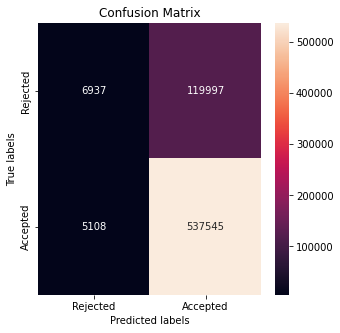

In [56]:
print(evaluation_summary("Performance of new model with fewer features", test["merged_or_not"], y_pred_new_2 , target_classes))

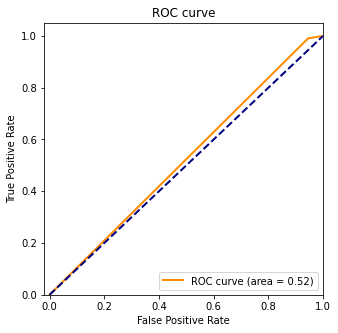

In [57]:
roc_auc_curve(test["merged_or_not"], y_pred_new_2)

**Strategy 3:** Derivatives of feature importance values where dy = the feature importance value itself and dx = the mean of all the feature importance values. Determining the average of the dydx values for threshold.

In [58]:
from numpy import diff

dx = threshold_1
features_dydx = diff(model.feature_importances_)/dx

In [59]:
sum = 0.0
for value in features_dydx:
  sum = sum+value
threshold_3 = sum/len(features_dydx)
print(threshold_3)

-0.0013368133540180597


In [60]:
imp_features_3 = []
for index in sorted_idx-1:
  for val in features_dydx:
    if val >= threshold_3:
      feature_to_consider_2 = X.columns[index]
  imp_features_3.append(feature_to_consider_2)

print(imp_features_3)
print(len(imp_features_3))

['ci_first_build_status', 'account_creation_days', 'pr_comment_num', 'ci_latency', 'ci_failed_perc', 'acc_commit_num', 'bug_fix', 'part_num_issue', 'perc_inte_neg_emo', 'perc_inte_neu_emo', 'pushed_delta', 'contrib_affiliation', 'social_strength', 'ci_last_build_status', 'ci_build_num', 'pr_succ_rate', 'test_inclusion', 'project_age', 'first_pr', 'open_issue_num', 'open_pr_num', 'language', 'ci_exists', 'core_member', 'contrib_country', 'part_num_code', 'fork_num', 'perc_inte_pos_emo', 'part_num_commit', 'first_response_time', 'churn_addition', 'same_affiliation', 'part_num_pr', 'contrib_first_emo', 'prior_interaction', 'perc_external_contribs', 'at_tag', 'contrib_gender', 'description_length', 'hash_tag', 'comment_conflict', 'ci_test_passed', 'contrib_follow_integrator', 'churn_deletion', 'same_country']
45


In [61]:
X_new_3 = pd.DataFrame(columns = imp_features_3)
for feature in imp_features_3:
  X_new_3[feature] = train[feature]

start=datetime.now()

model_new.fit(X_new_3, y)

print("Computation Time")
print(datetime.now()-start)

test_new_3 = pd.DataFrame(columns = imp_features_3)
for feature in imp_features_3:
  test_new_3[feature] = test[feature]

y_pred_new_3 = model_new.predict(test_new_3)

Computation Time
0:00:20.712613


In [62]:
results_new_3 = (test["merged_or_not"] == y_pred_new_3)
accuracy_new_3 = results_new_3.sum() / results_new_3.size
print(accuracy_new_3)

0.829599439654593


Evaluation for: Performance of new model with fewer features
              precision    recall  f1-score   support

    Rejected      0.693     0.182     0.288    126934
    Accepted      0.837     0.981     0.903    542653

    accuracy                          0.830    669587
   macro avg      0.765     0.581     0.596    669587
weighted avg      0.809     0.830     0.787    669587



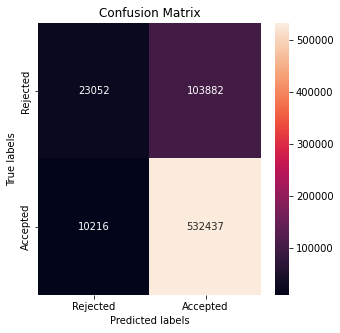

In [63]:
print(evaluation_summary("Performance of new model with fewer features", test["merged_or_not"], y_pred_new_3 , target_classes))

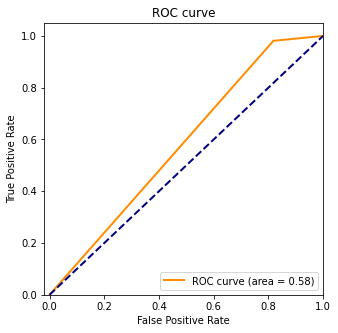

In [64]:
roc_auc_curve(test["merged_or_not"], y_pred_new_3)

**Strategy 4:** Information Gain and Entropy for feature selection.

*Important note::* The cell used to calculate feature gain and entropy is running into problem while processing working high volume of data present in the "train" dataframe, i.e., half of the original dataset, due to resource restriction. Hence, half of the "train" dataset, i.e., one-fourth of the original dataset, has been used in this strategy.

In [65]:
chunk_size = len(train)/2
get_chunk = flow_from_df(train, int(chunk_size))
ige = next(get_chunk)

In [66]:
import math
from collections import Counter

feature_gain = pd.DataFrame(columns = ["feature", "gain"])

def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

def split(dataset, column):
    split_data = []
    col_vals = dataset[column].unique()
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)

def find_best_split(dataset):
  global feature_gain 
  feature_gain = pd.DataFrame(columns=['feature', 'gain'])
  best_gain = 0
  best_feature = 0
  features = list(dataset.columns)
  features.remove('merged_or_not')
  for feature in features:
    split_data = split(dataset, feature)
    split_labels = [dataframe['merged_or_not'] for dataframe in split_data]
    gain = information_gain(dataset['merged_or_not'], split_labels)
    new_row = {'feature': feature, 'gain': gain}
    feature_gain = feature_gain.append(new_row, ignore_index = True)
    if gain>best_gain:
      best_gain = gain
      best_feature = feature
  return best_feature, best_gain

new_data = split(ige, find_best_split(ige)[0])

In [67]:
feature_gain = feature_gain.sort_values(by=['gain'])

feature_gain

,feature,gain
44,same_country,0.000016
45,same_affiliation,0.000026
14,bug_fix,0.000065
12,test_inclusion,0.000069
10,hash_tag,0.000151
34,contrib_gender,0.000196
9,comment_conflict,0.000211
39,perc_inte_pos_emo,0.000506
4,pr_comment_num,0.000519
38,perc_inte_neg_emo,0.000571


'id' metric is irrelevant in this context and hence will be droped in the next cell.

In [68]:
feature_gain.drop(feature_gain.index[-1], axis=0, inplace = True)

**Strategy 4.1:** Using the mean value of the gains of the features.

In [69]:
sum = 0.0
for rows in feature_gain.itertuples():
  sum = sum+rows.gain

threshold_4 = sum/len(feature_gain)
print(threshold_4)

0.02706200695034934


In [70]:
imp_features_4 = []
for rows in feature_gain.itertuples():
  if rows.gain>=threshold_4:
    imp_features_4.append(rows.feature)

print(imp_features_4)
print(len(imp_features_4))

['part_num_issue', 'prior_interaction', 'ci_latency', 'fork_num', 'acc_commit_num', 'first_response_time', 'social_strength', 'pr_succ_rate', 'perc_external_contribs', 'pushed_delta']
10


In [71]:
X_new_4 = pd.DataFrame(columns = imp_features_4)
for feature in imp_features_4:
  X_new_4[feature] = train[feature]

start=datetime.now()

model_new.fit(X_new_4, y)

print("Computation Time")
print(datetime.now()-start)

test_new_4 = pd.DataFrame(columns = imp_features_4)
for feature in imp_features_4:
  test_new_4[feature] = test[feature]

y_pred_new_4 = model_new.predict(test_new_4)

Computation Time
0:00:30.277181


In [72]:
results_new_4 = (test["merged_or_not"] == y_pred_new_4)
accuracy_new_4 = results_new_4.sum() / results_new_4.size
print(accuracy_new_4)

0.8225876547782439


Evaluation for: Performance of new Model with less features
              precision    recall  f1-score   support

    Rejected      0.622     0.164     0.259    126934
    Accepted      0.833     0.977     0.899    542653

    accuracy                          0.823    669587
   macro avg      0.727     0.570     0.579    669587
weighted avg      0.793     0.823     0.778    669587



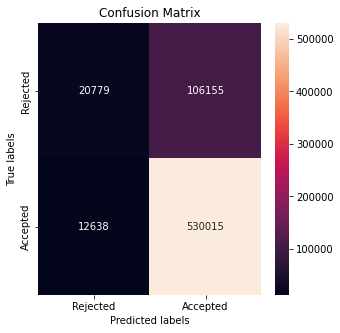

In [73]:
print(evaluation_summary("Performance of new Model with less features", test["merged_or_not"], y_pred_new_4, target_classes))

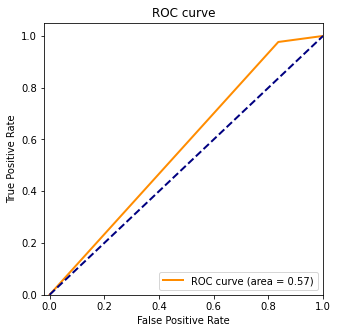

In [74]:
roc_auc_curve(test["merged_or_not"], y_pred_new_4)

### **Evaluation and Recommendation**

In [75]:
def recommendation_metrics(imp_features, pull_request_chars):
  reco = []
  for feature in imp_features:
    if feature in pull_request_chars:
      reco.append(feature)
  return reco

In [76]:
pull_request_characteristics = ['churn_addition', 'bug_fix', 'test_inclusion',
                                'at_tag', 'part_num_X', 'ci_exists', 'ci_latency',
                                'ci_test_passed', 'ci_failed_perc', 'churn_deletion',
                                'description_length', 'comment_conflict', 'pr_comment_num',
                                'part_num_code', 'ci_build_num', 'perc_neg_emotion',
                                'perc_pos_emotion', 'perc_neu_emotion', 'ci_first_build_status',
                                'ci_last_build_status']

In [77]:
rec = df[int(len(df.index)/2):len(df.index)]

rec

,id,project_id,github_id,pull_request_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
1673968,1673969,16160044,1198,35541685,projectatomic,atomic,0,143,NaN,2,...,0,2,0,0,19.0,0,0.305247,0,143,0
1673969,1673970,4314311,2007,11518322,keycloak,keycloak,1,55,55.0,1,...,0,0,0,0,9.0,0,0.148940,0,55,0
1673970,1673971,88889162,245,61433613,ministryofjustice,et3,0,1696,NaN,12,...,0,0,0,0,1896.0,0,0.038939,0,1696,0
1673971,1673972,8804952,2436,27958680,SonarSource,sonarqube,1,3640,3640.0,2,...,0,0,0,0,58.0,1,0.150121,0,3640,0
1673972,1673973,26051663,91,9852622,JMRI,JMRI,1,0,0.0,1,...,0,0,0,0,14.0,0,0.002150,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,3347933,30544060,258,25263316,Kronos-Integration,kronos-service-consul,1,9,9.0,1,...,0,0,0,0,2537.0,0,0.696970,0,9,0
3347933,3347934,1142,27876,9812944,saltstack,salt,0,1165,NaN,1,...,0,1,0,0,42.0,0,0.056849,0,1165,0
3347934,3347935,31499094,444,19063491,mjmlio,mjml,1,8834,8834.0,2,...,0,8,0,0,597.0,0,0.002041,0,8834,0
3347935,3347936,55317,651,2087506,zotonic,zotonic,0,703,NaN,7,...,0,0,0,0,10.0,0,0.000732,0,703,0


In [78]:
rec_columns = rec.columns.to_list()

for metric in rec_columns:
  if metric not in list_of_metrics:
    rec.drop(metric, axis=1, inplace=True)

rec

,id,merged_or_not,perc_external_contribs,churn_addition,churn_deletion,pr_comment_num,part_num_issue,part_num_commit,part_num_pr,part_num_code,...,contrib_affiliation,contrib_first_emo,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation
1673968,1673969,0,0.010695,14,0,0,3,0,0,0,...,redhatofficial,neutral,0.0,0.5,0.5,0,193,0.333333,NaN,0.0
1673969,1673970,1,0.190860,6,3,0,0,0,0,0,...,red hat,NaN,0.0,0.0,0.0,0,128,0.210526,1.0,1.0
1673970,1673971,0,0.083893,32,33,0,0,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0,41,0.222222,NaN,NaN
1673971,1673972,1,0.000404,13,13,0,0,0,0,0,...,sonarsource,NaN,0.0,0.0,0.0,0,847,0.314286,1.0,1.0
1673972,1673973,1,0.082583,6,3,0,0,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0,61,0.170732,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,3347933,1,0.000000,0,0,0,0,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0,30,0.000000,NaN,NaN
3347933,3347934,0,0.277100,9,1,0,2,0,0,0,...,NaN,neutral,0.0,0.0,0.0,0,865,0.268293,1.0,NaN
3347934,3347935,1,0.109677,6,0,0,2,0,0,0,...,NaN,neutral,0.0,0.0,0.0,0,2,0.083333,1.0,NaN
3347935,3347936,0,0.154545,3,12,0,0,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0,13,0.157895,NaN,NaN


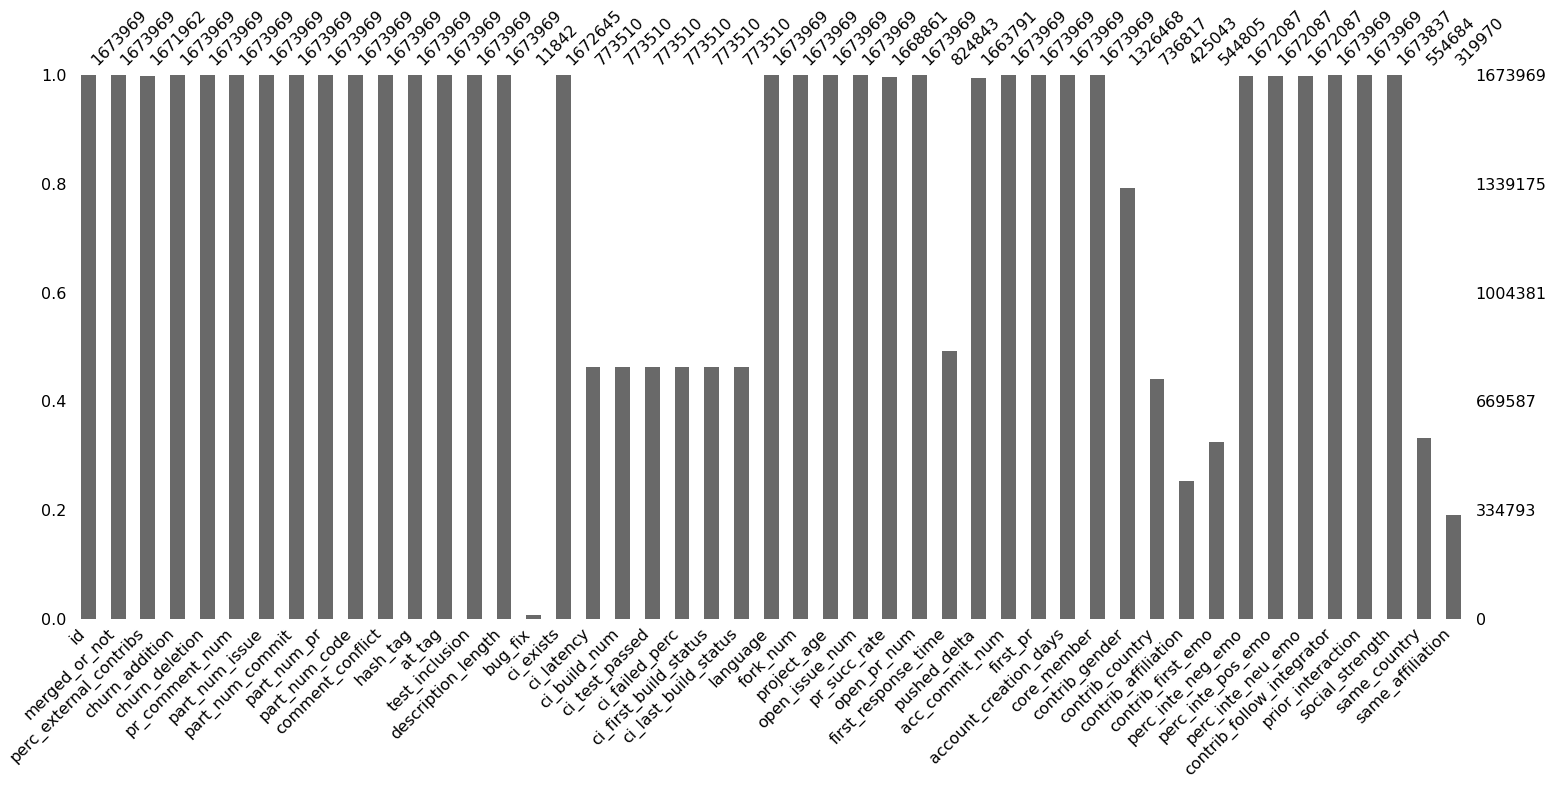

In [79]:
msno.bar(rec)

In [80]:
rec = rec.fillna(rec.mode().iloc[0])

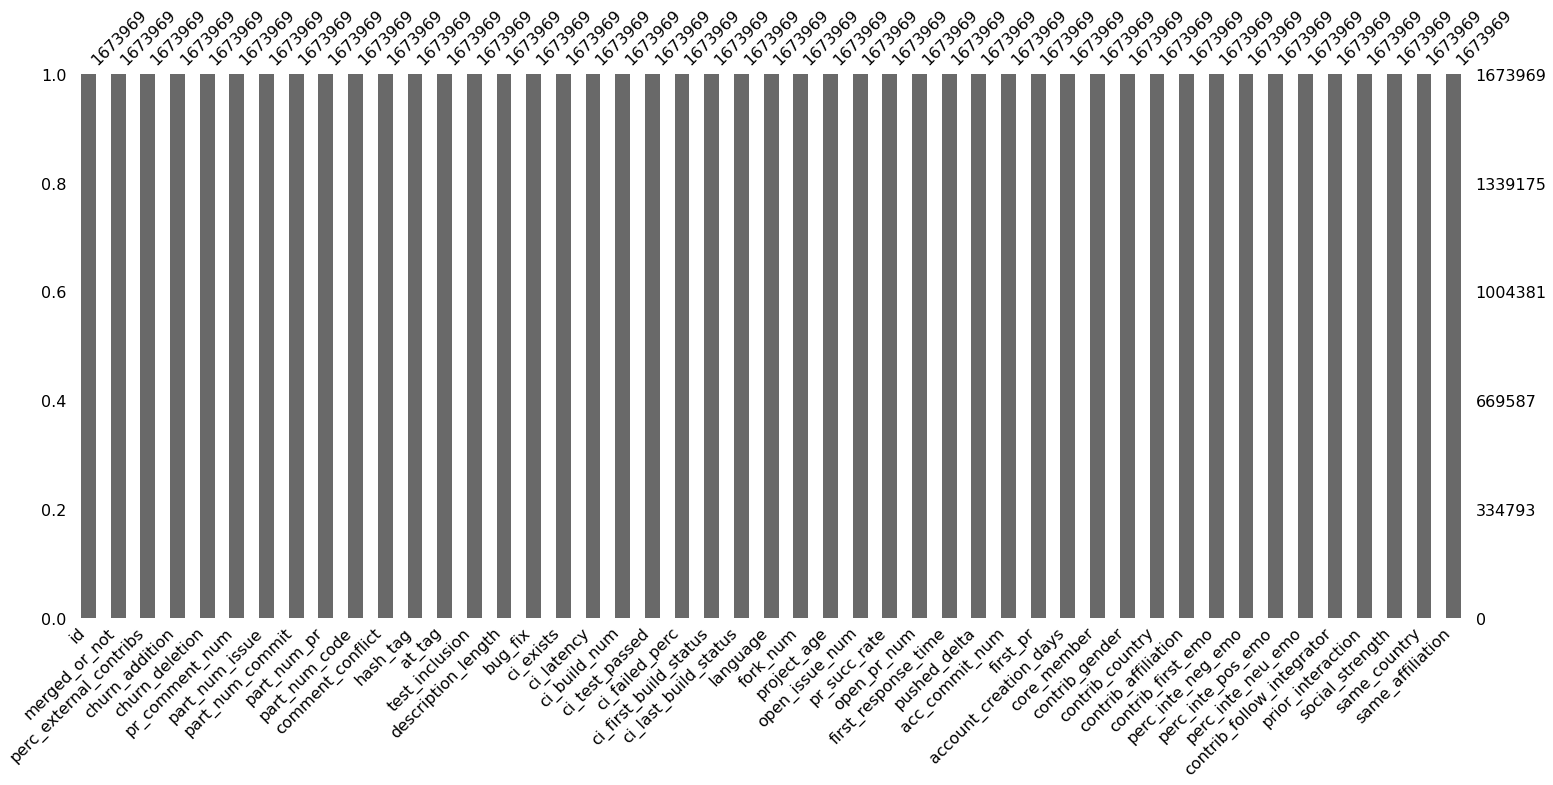

In [81]:
msno.bar(rec)

Manually annotating the metrics 'ci_first_build_status', 'ci_last_build_status', 'language', 'contrib_gender', 'contrib_country', 'contrib_affiliation' and 'contrib_first_emo' using the [dictionaries](https://colab.research.google.com/drive/1_68KgoyDN1w6K4nzdfPjaI-aoJOLTDy7?authuser=2#scrollTo=3zk8aGqsnMap&line=6&uniqifier=1) created earlier. It is possible that one or many keys vary from the training dataset to the testing dataset. However, at this point, it would be cumbersome to manually check. Hence, it is necessary to check if the test fails and if so, assign new labels to those unique values.

In [82]:
for metric in object_metrics:
  if metric == 'ci_first_build_status':
    for key in dict_ci_first_build_status:
      value = dict_ci_first_build_status[key]
      rec[metric].replace(key, value, inplace= True)
  if metric == 'ci_last_build_status':
    for key in dict_ci_last_build_status:
      value = dict_ci_last_build_status[key]
      rec[metric].replace(key, value, inplace= True)
  if metric == 'language':
    for key in dict_language:
      value = dict_language[key]
      rec[metric].replace(key, value, inplace= True)
  if metric == 'contrib_gender':
    for key in dict_contrib_gender:
      value = dict_contrib_gender[key]
      rec[metric].replace(key, value, inplace= True)
  if metric == 'contrib_country':
    for key in dict_contrib_country:
      value = dict_contrib_country[key]
      rec[metric].replace(key, value, inplace= True)
  if metric == 'contrib_affiliation':
    for key in dict_contrib_affiliation:
      value = dict_contrib_affiliation[key]
      rec[metric].replace(key, value, inplace= True)
  if metric == 'contrib_first_emo':
    for key in dict_contrib_first_emo:
      value = dict_contrib_first_emo[key]
      rec[metric].replace(key, value, inplace= True)

In [83]:
model_new_rec = xgb.XGBClassifier(max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                          reg_alpha = int(best_hyperparams['reg_alpha']), min_child_weight=int(best_hyperparams['min_child_weight']),
                          colsample_bytree=int(best_hyperparams['colsample_bytree']))

Evaluation and recommendation with Strategy 1 (Mean of the feature importance values)

In [84]:
rec_test = pd.DataFrame(columns = imp_features_1)

for feature in imp_features_1:
  rec_test[feature] = rec[feature]

rec_test

,ci_last_build_status,core_member,part_num_issue,ci_build_num,ci_first_build_status,first_pr,ci_exists,part_num_commit
1673968,1,1,3,1.0,1,0,1.0,0
1673969,1,1,0,1.0,1,0,1.0,0
1673970,1,1,0,1.0,1,0,1.0,0
1673971,1,1,0,1.0,1,0,1.0,0
1673972,1,1,0,1.0,1,0,1.0,0
...,...,...,...,...,...,...,...,...
3347932,1,1,0,1.0,1,0,1.0,0
3347933,1,1,2,1.0,1,0,1.0,0
3347934,1,0,2,1.0,1,0,1.0,0
3347935,1,0,0,1.0,1,0,0.0,0


In [85]:
start=datetime.now()

model_new_rec.fit(X_new_1, y)

print("Computation Time")
print(datetime.now()-start)

rec_y_pred = model_new_rec.predict(rec_test)

Computation Time
0:00:06.125431


In [86]:
results_new_rec = (rec['merged_or_not'] == rec_y_pred)
accuracy_new_rec = results_new_rec.sum() / results_new_rec.size
print(accuracy_new_rec)

0.8126452759877871


Evaluation for: Model Perfomance on Evaluation Data
              precision    recall  f1-score   support

    Rejected      0.586     0.060     0.109    319295
    Accepted      0.817     0.990     0.895   1354674

    accuracy                          0.813   1673969
   macro avg      0.702     0.525     0.502   1673969
weighted avg      0.773     0.813     0.745   1673969



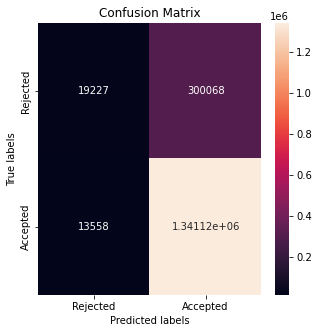

In [87]:
print(evaluation_summary("Model Perfomance on Evaluation Data", rec["merged_or_not"], rec_y_pred, target_classes))

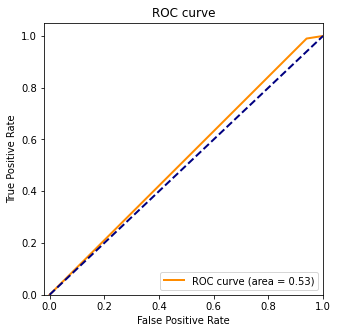

In [88]:
roc_auc_curve(rec['merged_or_not'], rec_y_pred)

Using SHAP to determine the underperforming features among the lot.

In [89]:
import shap

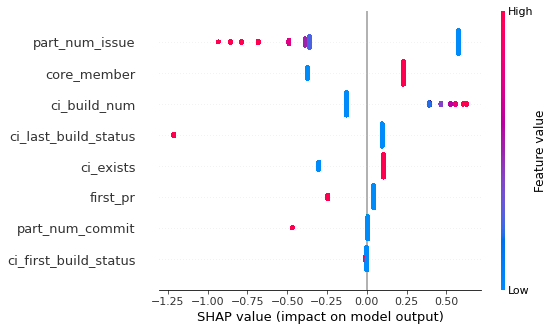

In [90]:
explainer = shap.TreeExplainer(model_new_rec)
shap_values = explainer.shap_values(rec_test)

shap.initjs()
shap.summary_plot(shap_values, rec_test)

Pull-request characteristics that could be possibly changed.

In [91]:
reco_strategy1 = recommendation_metrics(imp_features_1, pull_request_characteristics)
for feature in reco_strategy1:
  print(feature," can be used for recommendation.")

ci_last_build_status  can be used for recommendation.
ci_build_num  can be used for recommendation.
ci_first_build_status  can be used for recommendation.
ci_exists  can be used for recommendation.


In [92]:
data = train_test.copy(deep=True)
data_columns = data.columns.to_list()
for features in data_columns:
  if features == "merged_or_not":
    continue
  elif features not in reco_strategy1:
    data.drop(features, axis=1, inplace = True)

data = data.drop(data[data.merged_or_not == 0].index)
data

,merged_or_not,ci_exists,ci_build_num,ci_first_build_status,ci_last_build_status
0,1,1.0,1.0,1,1
2,1,1.0,1.0,1,1
3,1,1.0,1.0,1,1
4,1,1.0,1.0,1,1
5,1,1.0,1.0,1,1
...,...,...,...,...,...
1673962,1,0.0,1.0,1,1
1673963,1,1.0,2.0,1,1
1673964,1,1.0,2.0,1,2
1673965,1,1.0,1.0,1,1


In [93]:
compare = rec.copy(deep=True)
compare_columns = compare.columns.to_list()

for features in compare_columns:
  if features not in reco_strategy1:
    compare.drop(features, axis=1, inplace = True)

compare.insert(0, 'predicted_merged_or_not', rec_y_pred)
compare = compare.drop(compare[compare.predicted_merged_or_not == 1].index)
compare

,predicted_merged_or_not,ci_exists,ci_build_num,ci_first_build_status,ci_last_build_status
1674062,0,1.0,1.0,2,2
1674110,0,1.0,2.0,2,2
1674140,0,1.0,1.0,2,2
1674155,0,1.0,5.0,2,2
1674235,0,0.0,1.0,1,1
...,...,...,...,...,...
3347768,0,1.0,3.0,2,2
3347785,0,1.0,16.0,2,2
3347814,0,1.0,11.0,2,2
3347832,0,0.0,1.0,1,1


In [94]:
for features in reco_strategy1:
  print("Merged requests mostly had '",data[features].value_counts().idxmax(),
        "', whereas unmerged requests mostly had '", 
        compare[features].value_counts().idxmax(),"' in ", features)

Merged requests mostly had ' 1 ', whereas unmerged requests mostly had ' 2 ' in  ci_last_build_status
Merged requests mostly had ' 1.0 ', whereas unmerged requests mostly had ' 1.0 ' in  ci_build_num
Merged requests mostly had ' 1 ', whereas unmerged requests mostly had ' 2 ' in  ci_first_build_status
Merged requests mostly had ' 1.0 ', whereas unmerged requests mostly had ' 1.0 ' in  ci_exists


In [95]:
dict_ci_last_build_status

{'success': 1, 'failure': 2}

In [96]:
dict_ci_first_build_status

{'success': 1, 'failure': 2}

This proves that most unmerged pull-requests failed both its first build and last build whereas success was required.

In [97]:
del data
del compare
del rec_test

Evaluation and recommendation with Strategy 4.

In [98]:
rec_test = pd.DataFrame(columns = imp_features_4)

for feature in imp_features_4:
  rec_test[feature] = rec[feature]

rec_test

,part_num_issue,prior_interaction,ci_latency,fork_num,acc_commit_num,first_response_time,social_strength,pr_succ_rate,perc_external_contribs,pushed_delta
1673968,3,193,125.0,132,797,135.0,0.333333,0.970787,0.010695,304038.0
1673969,0,128,2336.0,205,843,0.0,0.210526,0.984974,0.190860,8146.0
1673970,0,41,125.0,1,69,0.0,0.222222,0.958042,0.083893,1206410.0
1673971,0,847,1092.0,591,6150,0.0,0.314286,0.969887,0.000404,7725.0
1673972,0,61,125.0,18,58,0.0,0.170732,1.000000,0.082583,2277.0
...,...,...,...,...,...,...,...,...,...,...
3347932,0,30,125.0,0,414,0.0,0.000000,1.000000,0.000000,18087.0
3347933,2,865,125.0,2454,3389,41.0,0.268293,0.965155,0.277100,431.0
3347934,2,2,125.0,125,2,9.0,0.083333,0.992126,0.109677,78766.0
3347935,0,13,125.0,84,3,0.0,0.157895,0.991597,0.154545,995650.0


In [99]:
start=datetime.now()

model_new_rec.fit(X_new_4, y)

print("Computation Time")
print(datetime.now()-start)

rec_y_pred = model_new_rec.predict(rec_test)

Computation Time
0:00:33.525342


In [100]:
results_new_rec = (rec['merged_or_not'] == rec_y_pred)
accuracy_new_rec = results_new_rec.sum() / results_new_rec.size
print(accuracy_new_rec)

0.8208467420842321


Evaluation for: Model Perfomance on Evaluation Data
              precision    recall  f1-score   support

    Rejected      0.638     0.141     0.230    319295
    Accepted      0.829     0.981     0.899   1354674

    accuracy                          0.821   1673969
   macro avg      0.733     0.561     0.564   1673969
weighted avg      0.792     0.821     0.771   1673969



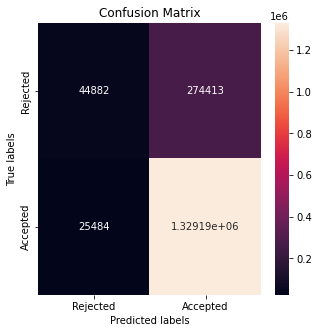

In [101]:
print(evaluation_summary("Model Perfomance on Evaluation Data", rec["merged_or_not"], rec_y_pred, target_classes))

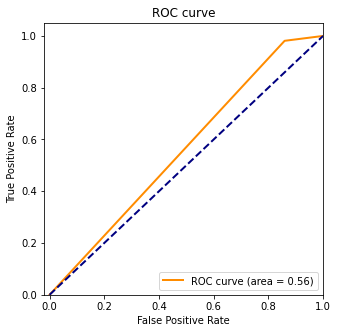

In [102]:
roc_auc_curve(rec['merged_or_not'], rec_y_pred)

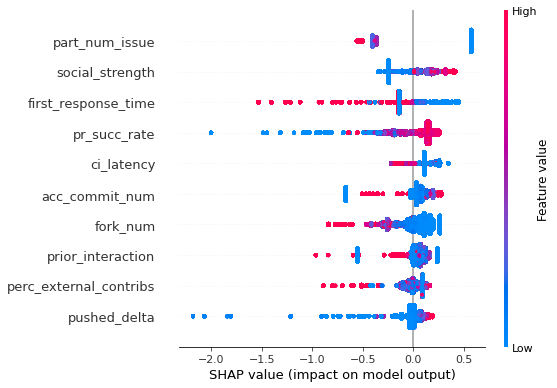

In [103]:
explainer = shap.TreeExplainer(model_new_rec)
shap_values = explainer.shap_values(rec_test)

shap.initjs()
shap.summary_plot(shap_values, rec_test)

In [104]:
reco_strategy4 = recommendation_metrics(imp_features_4, pull_request_characteristics)
for feature in reco_strategy4:
  print(feature," can be used for recommendation.")

ci_latency  can be used for recommendation.


In [105]:
data = train_test.copy(deep=True)
data_columns = data.columns.to_list()
for features in data_columns:
  if features == "merged_or_not":
    continue
  elif features not in reco_strategy4:
    data.drop(features, axis=1, inplace = True)

data = data.drop(data[data.merged_or_not == 0].index)
data

,merged_or_not,ci_latency
0,1,274.0
2,1,88.0
3,1,489.0
4,1,261.0
5,1,120.0
...,...,...
1673962,1,120.0
1673963,1,476.0
1673964,1,11881.0
1673965,1,120.0


In [106]:
compare = rec.copy(deep=True)
compare_columns = compare.columns.to_list()

for features in compare_columns:
  if features not in reco_strategy4:
    compare.drop(features, axis=1, inplace = True)

compare.insert(0, 'predicted_merged_or_not', rec_y_pred)
compare = compare.drop(compare[compare.predicted_merged_or_not == 1].index)
compare

,predicted_merged_or_not,ci_latency
1673977,0,2541.0
1674004,0,7410.0
1674019,0,125.0
1674030,0,125.0
1674055,0,8678.0
...,...,...
3347785,0,1229.0
3347798,0,125.0
3347870,0,96.0
3347894,0,3787.0


In [107]:
for features in reco_strategy4:
  print("Merged requests mostly had '",data[features].value_counts().idxmax(),
        "', whereas unmerged requests mostly had '", 
        compare[features].value_counts().idxmax(),"' in ", features)

Merged requests mostly had ' 120.0 ', whereas unmerged requests mostly had ' 125.0 ' in  ci_latency


This proves that most unmerged pull request had a continuous integration latency of 125 minutes as opposed to 120 minutes which is the norm for pull-requests that are accepted.

In [108]:
del data
del compare
del rec_test